# 1. Twitter APIによるデータ取得

フォローしている400名の過去200件のツイートについて、以下の項目を取得する
- user_id
- created_at
- tweet id
- followers_count
- friends_count
- retweet_count
- is_quote_status
- in_reply_to_screen_name

In [ ]:
# 基本的なモジュール
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd
import time

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

from datetime import datetime
import os
import matplotlib.dates as mdates

In [ ]:
# Twitter APIの初期化
import json, config
import twitter

# configからキー情報を読み込む
CK = config.CONSUMER_KEY
CS = config.CONSUMER_SECRET
AT = config.ACCESS_TOKEN
ATS = config.ACCESS_TOKEN_SECRET

api = twitter.Api(consumer_key=CK,
                  consumer_secret=CS,
                  access_token_key=AT,
                  access_token_secret=ATS
                  )

In [ ]:
# フォローしているアカウントの一覧の取得
friends = api.GetFriends()

# 対象アカウントのツイートを取得
friends_statuse = []
n_friends = 400
n_tweets = 200
friends_statuse = []
for i,friend in enumerate(friends):
    if i > n_friends:
        break
    friends_statuse.append(api.GetUserTimeline(friend.id, count=n_tweets))

In [ ]:
# Tweetをデータフレーム 型に変換
def rec_tw(fs):
    col = ['u_id', 'u_name', 't_id', 't_created_at', 'u_friends', 'u_followers', 't_text', 't_fav', 't_ret', 't_rep_to', 't_rt_from', 't_qt_from']
    val = [[fs.user.id_str, fs.user.name, fs.id_str, pd.to_datetime(fs.created_at),fs.user.friends_count, fs.user.followers_count, 
           fs.text, fs.favorite_count, fs.retweet_count, fs.in_reply_to_screen_name, fs.retweeted_status, fs.quoted_status_id_str]]
    rec = DataFrame(columns=col, data = val)
    return rec

df = DataFrame(columns=['u_id', 'u_name', 't_id', 'u_friends', 'u_followers', 't_text', 't_fav', 't_ret', 't_rep_to', 't_rt_from','t_qt_from'])
for l_fs in friends_statuse:
    for fs in l_fs:
        df = df.append(rec_tw(fs))

In [ ]:
df

,u_id,u_name,t_id,u_friends,u_followers,t_text,t_fav,t_ret,t_rep_to,t_rt_from,t_qt_from,t_created_at
0,789558343408902144,にゃんべい,1275802874723762176,333,153,まだできることは少ないですが、どんどんステップアップしていきたいので、「雇っても良いよ」とい...,2,0,poly_poly01,None,None,2020-06-24 14:48:03+00:00
0,789558343408902144,にゃんべい,1275802873796767746,333,153,ひさびさに報告\n\n本日の勉強内容：days=50\n✅AIジョブカレ 機械学習講座\n ...,1,0,None,None,None,2020-06-24 14:48:03+00:00
0,789558343408902144,にゃんべい,1275783195997270017,333,153,RT @odashi_t: この「2位じゃ駄目なんですか」の件，議事録を直接読む前と後でだい...,0,548,None,"{""created_at"": ""Wed Jun 24 11:19:15 +0000 2020...",None,2020-06-24 13:29:51+00:00
0,789558343408902144,にゃんべい,1273404543338864640,333,153,RT @kspub_kodansha: ＼50周年！／抽選で3名に同時プレゼント。応募締切：...,0,1391,None,"{""created_at"": ""Wed Jun 17 22:50:06 +0000 2020...",None,2020-06-17 23:57:56+00:00
0,789558343408902144,にゃんべい,1271746082683273217,333,153,RT @arts_lib: 入門者向けテキストの半額セールを実施していたのですが、中途半端な...,0,49,None,"{""created_at"": ""Fri Apr 10 10:44:29 +0000 2020...",None,2020-06-13 10:07:48+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
0,740871151241465857,たこやき,1033964153805799424,55,49,シリコンバレーを一日中視聴中。\n面白い,0,0,None,None,None,2018-08-27 06:27:19+00:00
0,740871151241465857,たこやき,1033757631146483712,55,49,さあ 明日からロジスティック回帰とエントロピーと決定木を座学で理解を目標に勉強開始ですわー。...,0,0,None,None,None,2018-08-26 16:46:40+00:00
0,740871151241465857,たこやき,1033757184671211522,55,49,家の掃除も終了\n掃除始めるとやめられないのは一時的な集中力だけが高いという性格故だろうなー,0,0,None,None,None,2018-08-26 16:44:53+00:00
0,740871151241465857,たこやき,1033756449959161856,55,49,kaggleに予測初提出。タイタニックのチュートリアルだが、精度も順位もおそらくもっとも平均...,0,0,None,None,None,2018-08-26 16:41:58+00:00


# 2. Topicへの分類
- MeCabによる形態素解析
- gensimによるトピック分類（LDAモデル）

In [ ]:
import MeCab
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from collections import defaultdict
from gensim import corpora

In [ ]:
# MeCabオブジェクトの生成
mt = MeCab.Tagger('')
mt.parse('')

# 形態素解析
import re
def format_text(text):
    '''
    MeCabに入れる前のツイートの整形方法例
    '''

    text=re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-…]+', "", text)
    text=re.sub('RT', "", text)
    text=re.sub('お気に入り', "", text)
    text=re.sub('まとめ', "", text)
    text=re.sub(r'[!-~]', "", text)#半角記号,数字,英字
    text=re.sub(r'[︰-＠]', "", text)#全角記号
    text=re.sub('\n', " ", text)#改行文字

    return text

text_list=list(df['t_text'])
dictionary =corpora.Dictionary([text_list])
train_texts = []
for line in text_list:
    text = []
    line = format_text(line)
    node = mt.parseToNode(line.strip())
    while node:
        fields = node.feature.split(",")
        if fields[0] == '名詞' or fields[0] == '動詞' or fields[0] == '形容詞':
            text.append(node.surface)
        node = node.next
    train_texts.append(text)

'EOS\n'

In [ ]:
# トピック数の設定
NUM_TOPICS = 20

# ldaモデルの生成
dictionary = Dictionary(train_texts)

dictionary.filter_extremes(no_below=2,no_above=0.2)
dictionary.save_as_text('最終辞書.txt')

# 学習データでモデル生成
corpus = [dictionary.doc2bow(text) for text in train_texts]
lda = LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

# テストデータ（=学習データと同じもの）をモデルに掛ける
score_by_topic = defaultdict(int)
test_corpus = [dictionary.doc2bow(text) for text in train_texts]

# Tweet毎にモデルで推定したスコアを付与
def score_n(i, tc):
    try:
        ret = DataFrame(lda[tc]).set_index(0).loc[i, 1]
    except:
        ret = 0
    return ret

df = df.assign(
    corpus = test_corpus,
    topic1 = lambda df: df.corpus.map(lambda tc: score_n(0, tc)),
    topic2 = lambda df: df.corpus.map(lambda tc: score_n(1, tc)),
    topic3 = lambda df: df.corpus.map(lambda tc: score_n(2, tc)),
    topic4 = lambda df: df.corpus.map(lambda tc: score_n(3, tc)),
    topic5 = lambda df: df.corpus.map(lambda tc: score_n(4, tc)),
    topic6 = lambda df: df.corpus.map(lambda tc: score_n(5, tc)),
    topic7 = lambda df: df.corpus.map(lambda tc: score_n(6, tc)),
    topic8 = lambda df: df.corpus.map(lambda tc: score_n(7, tc)),
    topic9 = lambda df: df.corpus.map(lambda tc: score_n(8, tc)),
    topic10 = lambda df: df.corpus.map(lambda tc: score_n(9, tc)),
    topic11 = lambda df: df.corpus.map(lambda tc: score_n(10, tc)),
    topic12 = lambda df: df.corpus.map(lambda tc: score_n(11, tc)),
    topic13 = lambda df: df.corpus.map(lambda tc: score_n(12, tc)),
    topic14 = lambda df: df.corpus.map(lambda tc: score_n(13, tc)),
    topic15 = lambda df: df.corpus.map(lambda tc: score_n(14, tc)),
    topic16 = lambda df: df.corpus.map(lambda tc: score_n(15, tc)),
    topic17 = lambda df: df.corpus.map(lambda tc: score_n(16, tc)),
    topic18 = lambda df: df.corpus.map(lambda tc: score_n(17, tc)),
    topic19 = lambda df: df.corpus.map(lambda tc: score_n(18, tc)),
    topic20 = lambda df: df.corpus.map(lambda tc: score_n(19, tc))
)

In [ ]:
df

,u_id,u_name,t_id,u_friends,u_followers,t_text,t_fav,t_ret,t_rep_to,t_rt_from,...,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic20
0,789558343408902144,にゃんべい,1275802874723762176,333,153,まだできることは少ないですが、どんどんステップアップしていきたいので、「雇っても良いよ」とい...,2,0,poly_poly01,None,...,0.107177,0.052514,0.000000,0.195014,0.301318,0.000000,0.000000,0.00000,0.173393,0.000000
0,789558343408902144,にゃんべい,1275802873796767746,333,153,ひさびさに報告\n\n本日の勉強内容：days=50\n✅AIジョブカレ 機械学習講座\n ...,1,0,None,None,...,0.107225,0.000000,0.000000,0.000000,0.212837,0.000000,0.000000,0.00000,0.000000,0.000000
0,789558343408902144,にゃんべい,1275783195997270017,333,153,RT @odashi_t: この「2位じゃ駄目なんですか」の件，議事録を直接読む前と後でだい...,0,548,None,"{""created_at"": ""Wed Jun 24 11:19:15 +0000 2020...",...,0.000000,0.000000,0.000000,0.000000,0.000000,0.318284,0.000000,0.00000,0.000000,0.000000
0,789558343408902144,にゃんべい,1273404543338864640,333,153,RT @kspub_kodansha: ＼50周年！／抽選で3名に同時プレゼント。応募締切：...,0,1391,None,"{""created_at"": ""Wed Jun 17 22:50:06 +0000 2020...",...,0.149205,0.000000,0.000000,0.000000,0.159691,0.000000,0.000000,0.55817,0.000000,0.079588
0,789558343408902144,にゃんべい,1271746082683273217,333,153,RT @arts_lib: 入門者向けテキストの半額セールを実施していたのですが、中途半端な...,0,49,None,"{""created_at"": ""Fri Apr 10 10:44:29 +0000 2020...",...,0.078360,0.043091,0.063669,0.000000,0.143519,0.000000,0.044728,0.00000,0.000000,0.071833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,740871151241465857,たこやき,1033964153805799424,55,49,シリコンバレーを一日中視聴中。\n面白い,0,0,None,None,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.338334,0.00000,0.000000,0.000000
0,740871151241465857,たこやき,1033757631146483712,55,49,さあ 明日からロジスティック回帰とエントロピーと決定木を座学で理解を目標に勉強開始ですわー。...,0,0,None,None,...,0.151172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.110437
0,740871151241465857,たこやき,1033757184671211522,55,49,家の掃除も終了\n掃除始めるとやめられないのは一時的な集中力だけが高いという性格故だろうなー,0,0,None,None,...,0.087597,0.000000,0.000000,0.000000,0.000000,0.568981,0.000000,0.00000,0.000000,0.000000
0,740871151241465857,たこやき,1033756449959161856,55,49,kaggleに予測初提出。タイタニックのチュートリアルだが、精度も順位もおそらくもっとも平均...,0,0,None,None,...,0.000000,0.000000,0.171859,0.000000,0.000000,0.000000,0.131267,0.00000,0.000000,0.000000


# トピックへの分類状況

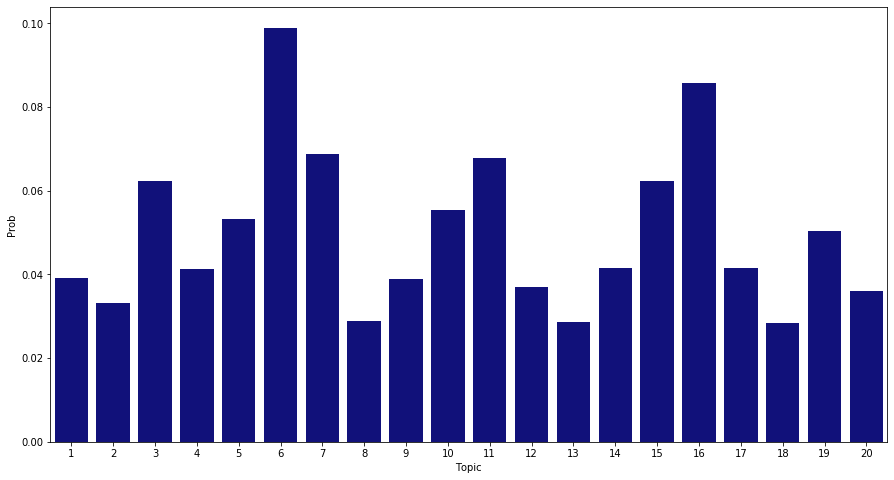

In [ ]:
#各Tweetの各トピックへの所属確率の算出
Prob_tweets=np.array(lda.get_document_topics(corpus,minimum_probability=0))[:,:,1]

#DataFrameに収納
L=[ z for z in range(1,NUM_TOPICS+1)]
col_name=list(map(lambda x: "Prob_"+str(x),L))
df_prob=pd.DataFrame(Prob_tweets)
df_prob.columns=col_name

#所属確率最大のトピック番号の算出
df_prob["Max"]=df_prob.idxmax(axis=1)
def del_Prob(x):
    return int(x.split("_")[1])
df_prob["Max"]=df_prob["Max"].apply(lambda x : del_Prob(x))

#各トピックの出現確率の算出。トピックへの所属確率を全Tweetで足して、全トピックで1になるように正規化
df_topic=pd.DataFrame(df_prob.drop("Max",axis=1).sum()/df_prob.drop("Max",axis=1).sum().sum())
df_topic.columns=["Prob"]
df_topic["Topic"]=[ z for z in range(1,NUM_TOPICS+1)]

#可視化
plt.figure(figsize = (15, 8))
ax= sns.barplot(x="Topic",y="Prob",data=df_topic,color="darkblue")
ax.set_xlabel("Topic")
ax.set_ylabel("Prob")
ax.tick_params(axis='x')
ax.tick_params(axis='y')
plt.show()

# トピックの解釈

In [ ]:
#トピックごとの単語と出現確率のDataFrameを作成し、リストに格納
topic_word_prob=[]

for z in range(NUM_TOPICS):
    word=[]
    prob=[]
    topic = lda.show_topic(z,1000) #適当な単語数分

    for t in topic:
        word.append(t[0])
        prob.append(t[1])
        
    df_lda=pd.DataFrame({"word":word,"prob":prob})
    topic_word_prob.append(df_lda)

In [ ]:
# topi1: 日本経済とコロナ
i=0
topic_word_prob[i].head(10)

,word,prob
0,日本,0.059844
1,英語,0.025008
2,経済,0.016367
3,する,0.015647
4,語,0.015522
5,決定,0.014583
6,自動,0.013870
7,コロナ,0.013584
8,ゲーム,0.012855
9,学生,0.012609


In [ ]:
# topi2: 独学プログラミングを応援する
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,週,0.032024
1,計算,0.019640
2,プログラミング,0.019576
3,買っ,0.019264
4,食べ,0.018708
5,①,0.016657
6,応援,0.014680
7,独学,0.013549
8,感想,0.013157
9,②,0.012885


In [ ]:
# topi3: 日々の感情
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,い,0.022807
1,み,0.022577
2,思っ,0.021636
3,しまっ,0.015918
4,こと,0.015809
5,なっ,0.013101
6,いい,0.013003
7,ほしい,0.012838
8,いう,0.012505
9,回,0.012462


In [ ]:
# topi4: マーケティングと効果検証
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,すごい,0.032815
1,実装,0.024040
2,メモ,0.022572
3,わかり,0.022072
4,マーケティング,0.019457
5,テスト,0.017417
6,さ,0.015668
7,効果,0.014609
8,検証,0.013658
9,記事,0.013029


In [ ]:
# topi5: 最近の記事を調べる
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,き,0.059581
1,なっ,0.035737
2,出,0.022641
3,い,0.018735
4,記事,0.017225
5,今,0.016660
6,いる,0.012742
7,書い,0.012251
8,最近,0.010952
9,調べ,0.010653


In [ ]:
# topi6: 自分と人を思う
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,こと,0.051726
1,人,0.049392
2,する,0.038785
3,自分,0.031636
4,ある,0.027161
5,ない,0.026541
6,いる,0.024297
7,いう,0.018794
8,なる,0.018486
9,思う,0.017361


In [ ]:
# topi7: 分析する
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,する,0.045578
1,いる,0.025194
2,さ,0.020374
3,こと,0.018407
4,いう,0.014358
5,分析,0.012506
6,ない,0.011878
7,人,0.010962
8,い,0.009498
9,ある,0.009437


In [ ]:
# topi8: 意識高い就活生
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,サービス,0.026009
1,フリー,0.025362
2,頑張っ,0.024441
3,就活,0.023579
4,いき,0.020233
5,顔,0.018174
6,学校,0.017262
7,コメント,0.017161
8,視聴,0.014659
9,写真,0.014621


In [ ]:
# topi9: 大学で研究する
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,研究,0.043458
1,画像,0.021338
2,大学,0.018570
3,予測,0.018322
4,方,0.016711
5,ラーニング,0.015411
6,インターン,0.014517
7,✅,0.014207
8,する,0.014199
9,つい,0.013777


In [ ]:
# topi10: 駆け出しエンジニアの勉強
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,笑,0.045889
1,勉強,0.025885
2,理解,0.019255
3,エンジニア,0.018840
4,サイト,0.018069
5,わから,0.015911
6,知識,0.015436
7,面白い,0.015283
8,ページ,0.015221
9,駆け出し,0.011739


In [ ]:
# topi11: 動画で勉強するでございます
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,ござい,0.065287
1,今日,0.053326
2,ライン,0.029404
3,公開,0.026808
4,オン,0.026658
5,勉強,0.024124
6,動画,0.023227
7,会,0.021409
8,明日,0.020135
9,日,0.018875


In [ ]:
# topi12: 積み上げ頑張る
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,積み上げ,0.051734
1,今日,0.029643
2,いい,0.028684
3,みんな,0.026498
4,参加,0.025399
5,やっ,0.023958
6,頑張り,0.022560
7,質問,0.020178
8,使用,0.011872
9,箱,0.009930


In [ ]:
# topi13: 読書は疲れる
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,読書,0.032548
1,疲れ,0.027670
2,ツイート,0.026681
3,昨日,0.026356
4,良かっ,0.021957
5,せ,0.018166
6,価格,0.018071
7,デジタル,0.016038
8,合計,0.015369
9,機,0.015187


In [ ]:
# topi14: 会社辛いね転職したいね
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,会社,0.050515
1,円,0.039000
2,万,0.033504
3,企業,0.021291
4,転職,0.019587
5,リモート,0.015812
6,事業,0.014646
7,採用,0.014503
8,株式,0.013482
9,さ,0.012368


In [ ]:
# topi15: ガチなデータサイエンティスト
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,データ,0.108483
1,学習,0.059369
2,統計,0.031474
3,機械,0.030700
4,分析,0.028901
5,サイエンティスト,0.023776
6,モデル,0.018826
7,サイエンス,0.018022
8,使っ,0.017021
9,する,0.016359


In [ ]:
# topi16: 自分に対する質問
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,こと,0.035444
1,いう,0.026357
2,する,0.022416
3,時,0.019804
4,ない,0.016875
5,自分,0.013776
6,質問,0.011794
7,ある,0.011466
8,見,0.011260
9,やる,0.011082


In [ ]:
# topi17: 募集するよ
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,年,0.053558
1,月,0.050015
2,日,0.046632
3,コード,0.033785
4,数,0.032222
5,ください,0.028975
6,募集,0.023196
7,解説,0.022355
8,東京,0.019578
9,本,0.013789


In [ ]:
# topi18: フォローするといいことあるよ
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,分,0.056589
1,すぎ,0.042058
2,二,0.040978
3,名,0.030233
4,フォロー,0.026022
5,応募,0.024002
6,✨,0.023973
7,プレゼント,0.022625
8,割,0.020707
9,寝,0.020127


In [ ]:
# topic19: 情報に関する問題解決
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,問題,0.028957
1,する,0.025392
2,コロナ,0.025297
3,情報,0.019397
4,い,0.014810
5,解決,0.013222
6,課題,0.012614
7,いる,0.011777
8,ある,0.011238
9,デザイン,0.011214


In [ ]:
# topic20: ブログ投稿するよ
i=i+1
topic_word_prob[i].head(10)

,word,prob
0,ブログ,0.055771
1,記事,0.028619
2,広告,0.027222
3,基礎,0.026986
4,レベル,0.024222
5,最高,0.023126
6,投稿,0.022077
7,ニュース,0.019490
8,やつ,0.018177
9,更新,0.014800


# 曜日・時間帯毎のトピック出現傾向

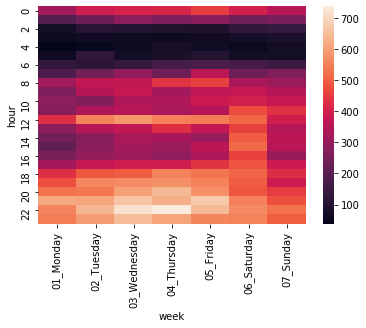

In [ ]:
# 曜日・時間帯毎の投稿数（ヒートマップ）
import datetime
df2 = df.assign(
    t_created_at = lambda df: df.t_created_at + datetime.timedelta(hours=9),
    hour = lambda df: df.t_created_at.dt.hour,
    week_ = lambda df: df.t_created_at.dt.day_name(),
    week = lambda df: df.week_.map(
        {'Monday': '01_Monday', 'Tuesday': '02_Tuesday', 
             'Wednesday': '03_Wednesday', 'Thursday': '04_Thursday',
             'Friday': '05_Friday', 'Saturday': '06_Saturday',
            'Sunday': '07_Sunday'})
)

df2.pivot_table(
    index='hour',
    columns='week',
    values='t_id',
    aggfunc='count'
).pipe(
    lambda df: sns.heatmap(df)
)

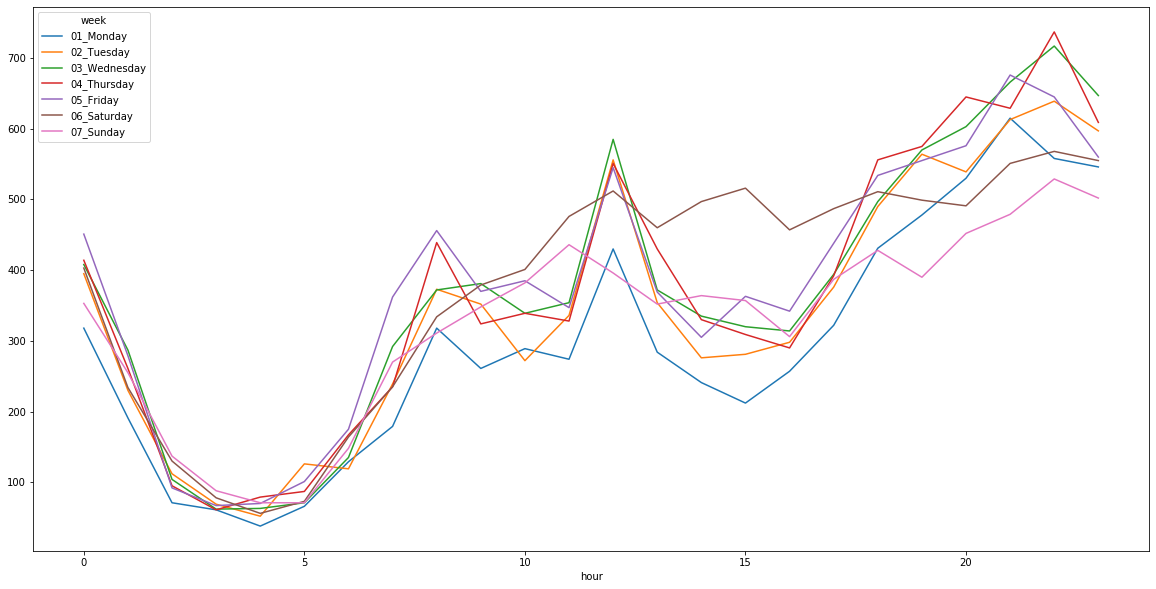

In [ ]:
# 曜日・時間帯毎の投稿数（推移図）
df2.pivot_table(
    index='hour',
    columns='week',
    values='t_id',
    aggfunc='count'
).plot(figsize=(20,10))

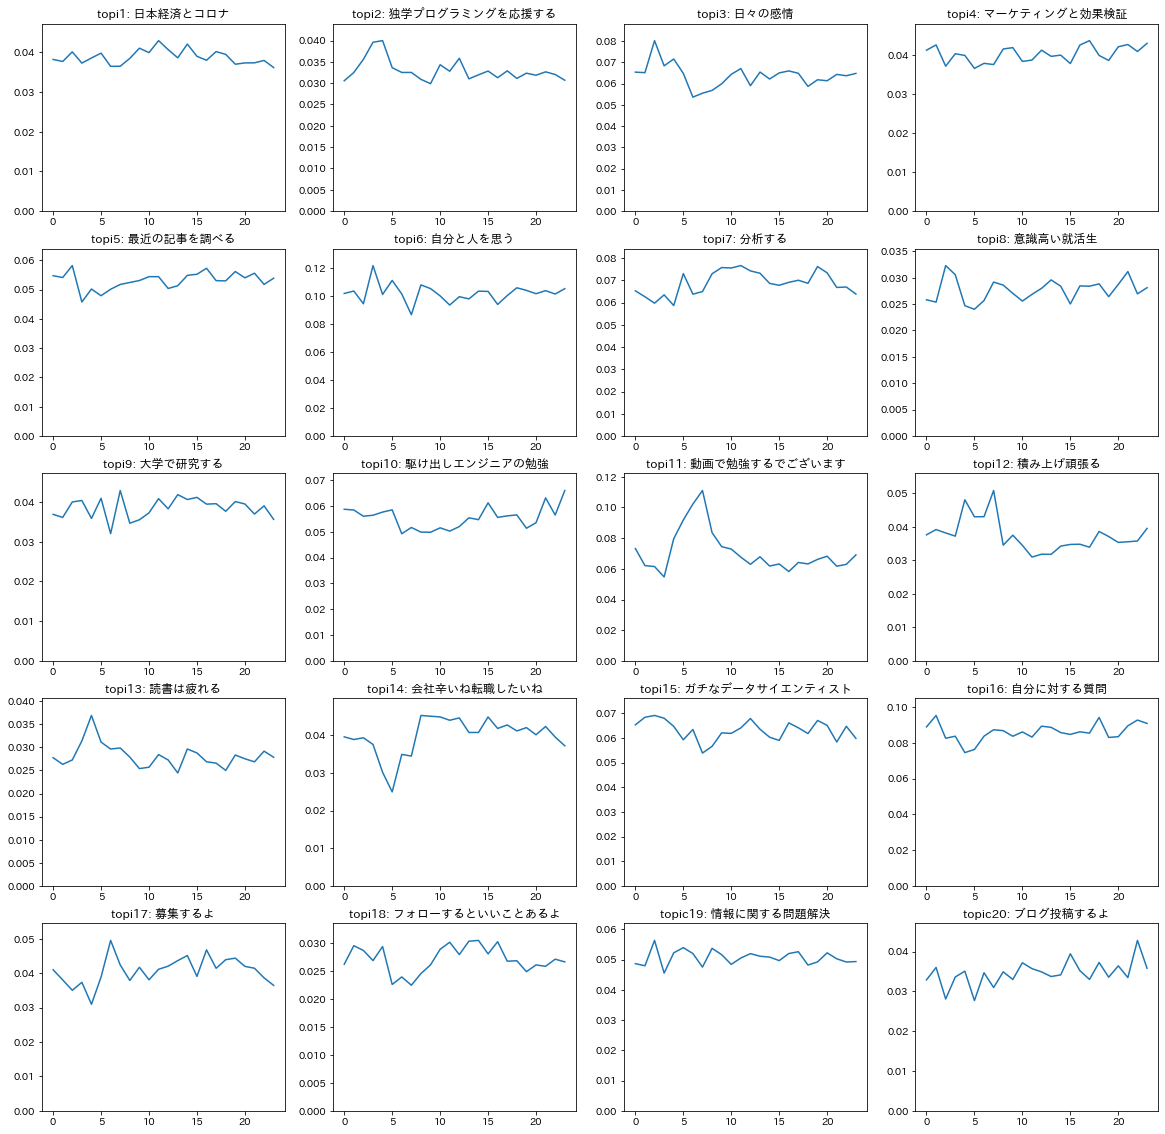

In [ ]:
# 時間帯毎のトピックの出現状況
df3 = df2.pivot_table(
    index=['hour'],
#    columns='topic1',
    values=['topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10', 
            'topic11', 'topic12', 'topic13', 'topic14', 'topic15', 'topic16', 'topic17', 'topic18', 'topic19', 'topic20'],
    aggfunc='sum'
).assign(
    total = lambda df: df.sum(axis=1)
).assign(
    topic1_r = lambda df: df.topic1/df.total,
    topic2_r = lambda df: df.topic2/df.total,
    topic3_r = lambda df: df.topic3/df.total,
    topic4_r = lambda df: df.topic4/df.total,
    topic5_r = lambda df: df.topic5/df.total,
    topic6_r = lambda df: df.topic6/df.total,
    topic7_r = lambda df: df.topic7/df.total,
    topic8_r = lambda df: df.topic8/df.total,
    topic9_r = lambda df: df.topic9/df.total,
    topic10_r = lambda df: df.topic10/df.total,
    topic11_r = lambda df: df.topic11/df.total,
    topic12_r = lambda df: df.topic12/df.total,
    topic13_r = lambda df: df.topic13/df.total,
    topic14_r = lambda df: df.topic14/df.total,
    topic15_r = lambda df: df.topic15/df.total,
    topic16_r = lambda df: df.topic16/df.total,
    topic17_r = lambda df: df.topic17/df.total,
    topic18_r = lambda df: df.topic18/df.total,
    topic19_r = lambda df: df.topic19/df.total,
    topic20_r = lambda df: df.topic20/df.total
).iloc[:,21:]

df3.columns = ['topi1: 日本経済とコロナ', 'topi2: 独学プログラミングを応援する', 'topi3: 日々の感情',  'topi4: マーケティングと効果検証',
 'topi5: 最近の記事を調べる' ,'topi6: 自分と人を思う', 'topi7: 分析する', 'topi8: 意識高い就活生', 'topi9: 大学で研究する',
'topi10: 駆け出しエンジニアの勉強', 'topi11: 動画で勉強するでございます', 'topi12: 積み上げ頑張る', 'topi13: 読書は疲れる', 
'topi14: 会社辛いね転職したいね', 'topi15: ガチなデータサイエンティスト', 'topi16: 自分に対する質問',
'topi17: 募集するよ', 'topi18: フォローするといいことあるよ', 'topic19: 情報に関する問題解決', 'topic20: ブログ投稿するよ']

# 可視化
plt.rcParams["font.family"] = "IPAexGothic"
df3.columns
plt.figure(figsize=(20,20))
for i in np.arange(20):
    plt.subplot(5,4,i+1)
    plt.plot(df3.iloc[:,i])
    plt.ylim(0, max(df3.iloc[:,i])*1.1)    
    plt.title(df3.columns[i])

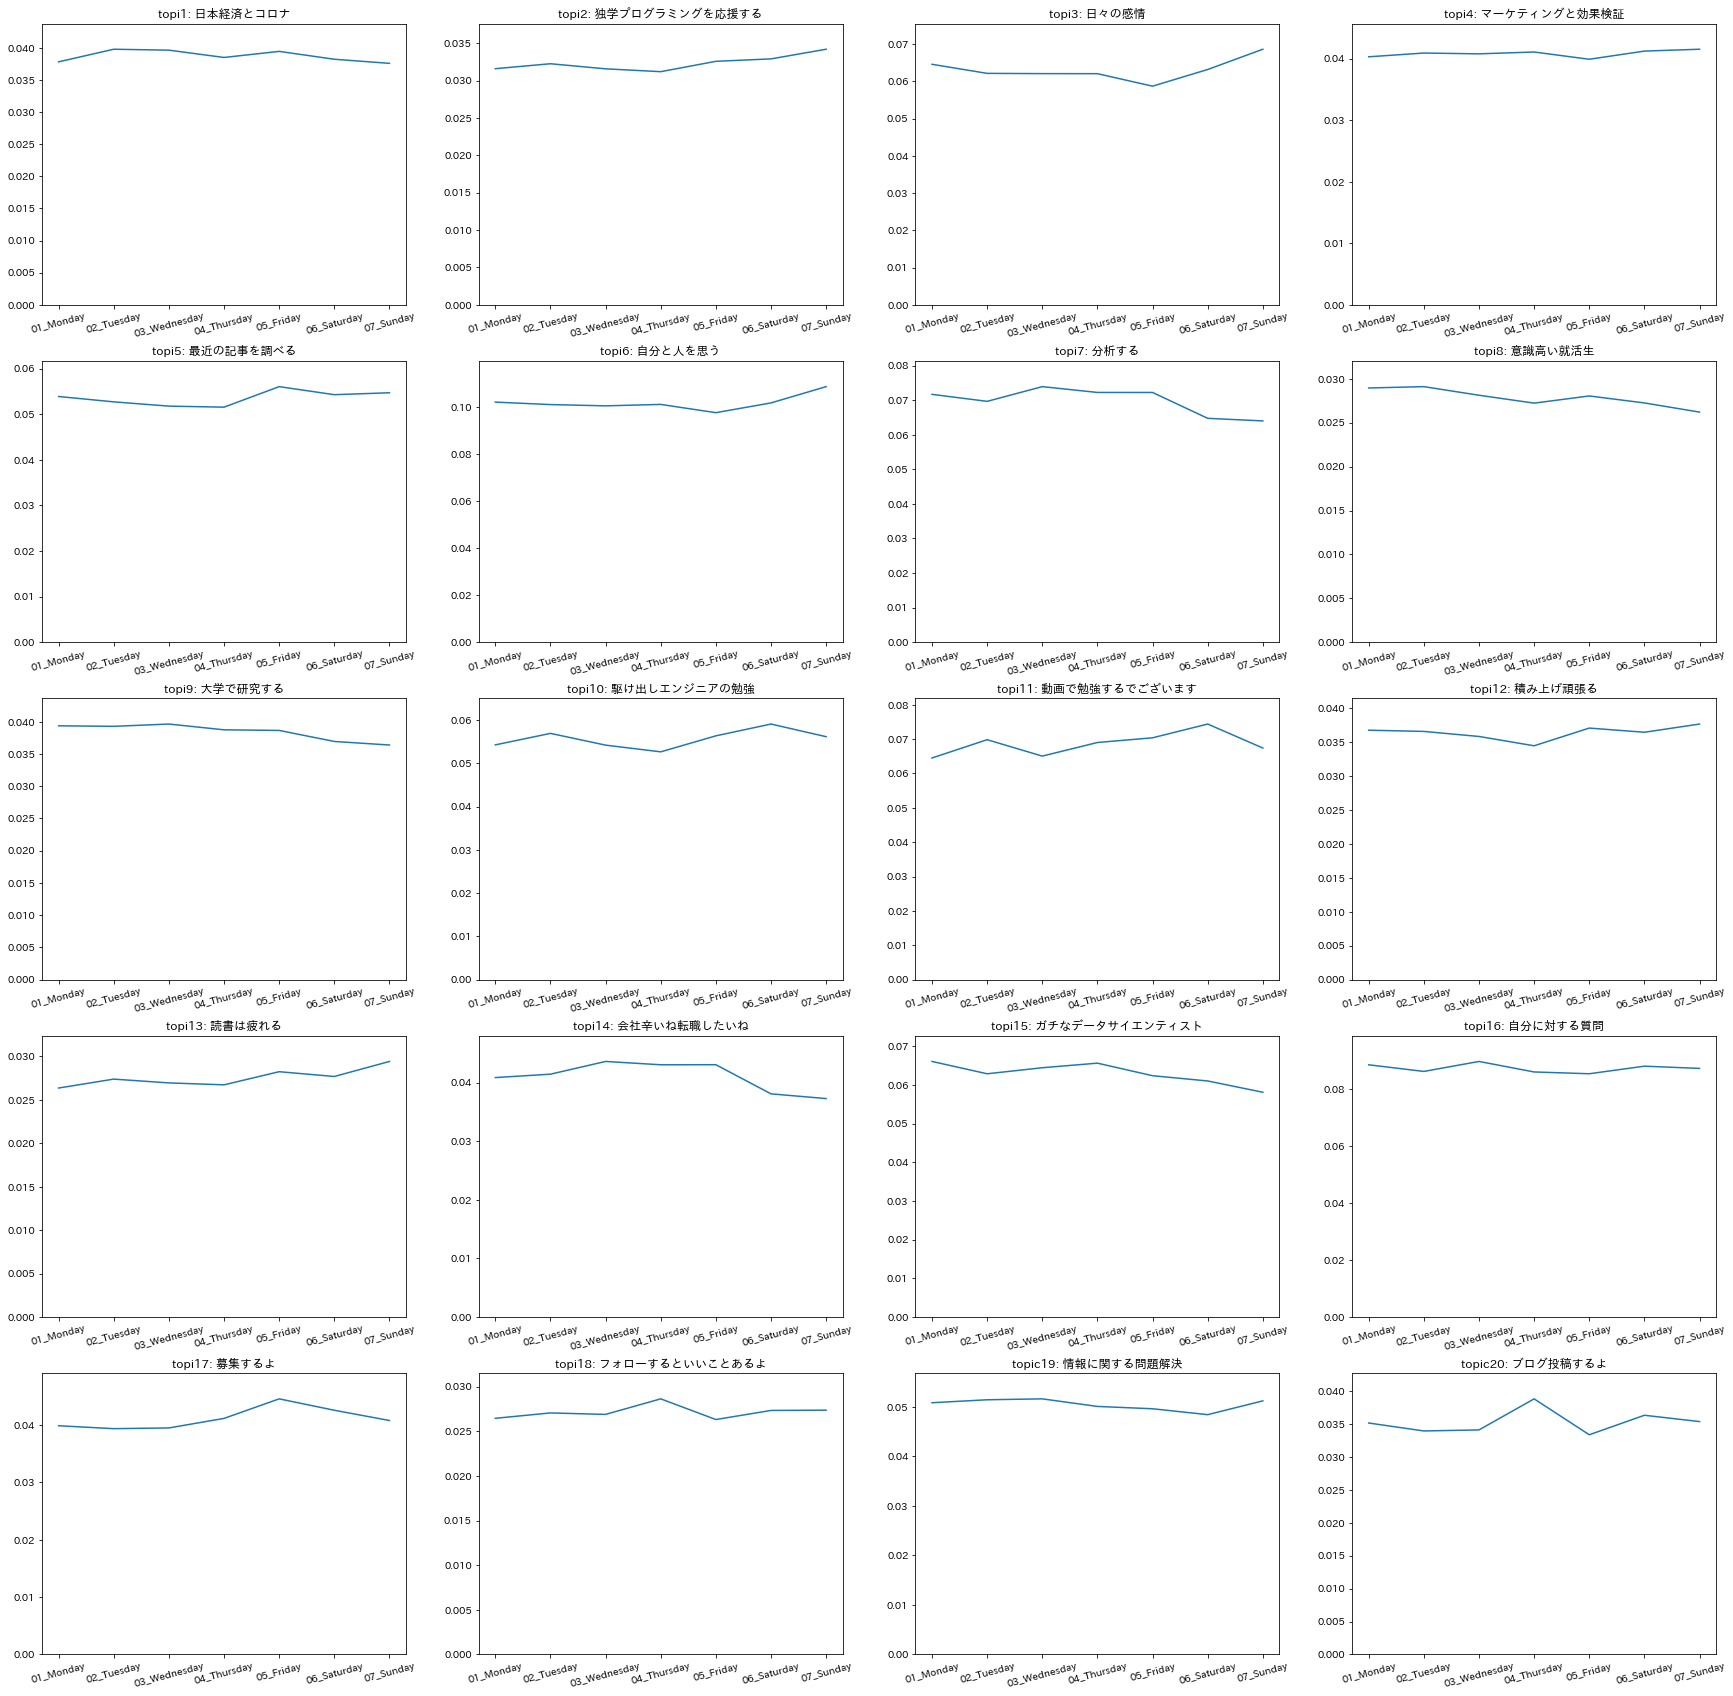

In [ ]:
# 曜日毎のトピックの出現状況
df4 = df2.pivot_table(
    index=['week'],
#    columns='topic1',
    values=['topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10', 
            'topic11', 'topic12', 'topic13', 'topic14', 'topic15', 'topic16', 'topic17', 'topic18', 'topic19', 'topic20'],
    aggfunc='sum'
).assign(
    total = lambda df: df.sum(axis=1)
).assign(
    topic1_r = lambda df: df.topic1/df.total,
    topic2_r = lambda df: df.topic2/df.total,
    topic3_r = lambda df: df.topic3/df.total,
    topic4_r = lambda df: df.topic4/df.total,
    topic5_r = lambda df: df.topic5/df.total,
    topic6_r = lambda df: df.topic6/df.total,
    topic7_r = lambda df: df.topic7/df.total,
    topic8_r = lambda df: df.topic8/df.total,
    topic9_r = lambda df: df.topic9/df.total,
    topic10_r = lambda df: df.topic10/df.total,
    topic11_r = lambda df: df.topic11/df.total,
    topic12_r = lambda df: df.topic12/df.total,
    topic13_r = lambda df: df.topic13/df.total,
    topic14_r = lambda df: df.topic14/df.total,
    topic15_r = lambda df: df.topic15/df.total,
    topic16_r = lambda df: df.topic16/df.total,
    topic17_r = lambda df: df.topic17/df.total,
    topic18_r = lambda df: df.topic18/df.total,
    topic19_r = lambda df: df.topic19/df.total,
    topic20_r = lambda df: df.topic20/df.total
).iloc[:,21:]

df4.columns = ['topi1: 日本経済とコロナ', 'topi2: 独学プログラミングを応援する', 'topi3: 日々の感情',  'topi4: マーケティングと効果検証',
 'topi5: 最近の記事を調べる' ,'topi6: 自分と人を思う', 'topi7: 分析する', 'topi8: 意識高い就活生', 'topi9: 大学で研究する',
'topi10: 駆け出しエンジニアの勉強', 'topi11: 動画で勉強するでございます', 'topi12: 積み上げ頑張る', 'topi13: 読書は疲れる', 
'topi14: 会社辛いね転職したいね', 'topi15: ガチなデータサイエンティスト', 'topi16: 自分に対する質問',
'topi17: 募集するよ', 'topi18: フォローするといいことあるよ', 'topic19: 情報に関する問題解決', 'topic20: ブログ投稿するよ']

# 可視化
plt.rcParams["font.family"] = "IPAexGothic"
df4.columns
plt.figure(figsize=(30,30))
for i in np.arange(20):
    plt.subplot(5,4,i+1)
    plt.plot(df4.iloc[:,i])
    plt.ylim(0, max(df4.iloc[:,i])*1.1)    
    plt.title(df4.columns[i])
    plt.xticks(rotation=15)